<a href="https://colab.research.google.com/github/ChristophWuersch/satw/blob/main/PageRank_basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://raw.githubusercontent.com/ChristophWuersch/satw/main/ost_logo.png" width="240" align="right"/>
<div style="text-align: left"> <b> satw TecDay </b> <br> Algorithmen auf Graphen <br> 
<a href="mailto:christoph.wuersch@ost.ch"> Christoph Würsch </a> </div>

# Page-Rank Algorithmus

Die einfachste Form des Page-Rank-Algorithmus funktioniert wie folgt:

- Zunächst (bei der Iteration $k=0$) wird der *Page-Rank* $v_i$ für jeden Knoten $i$ gemäss einer gleichverteilten Wahrscheinlichkeitsdichte initialiert.
- Das heisst, jeder Knoten $i$ bekommt anfänglich den gleichen Page-Rank $v_i =\frac{1}{N}$, wobei $N$ die Anzahl der Knoten des Netztes ist. 
- Die Page-Rank-Werte aller Knoten lassen sich als ein Vektor $\vec{v}$ darstellen.
- Zu Beginn (Iteration $k=0$) sieht der Vektor der Page-Ranks folgendermassen aus:
 
$$ \vec{v}_{k=0} = \frac{1}{N} \begin{pmatrix} 
1 \\ 1 \\ \vdots  \\ 1 \end{pmatrix}$$




- Die *modifizierte Adjazenz-Matrix* $\hat{A}$ wird dann aus der Adjazenzmatrix $A$ und dem Dämpfungsfaktor $d$ folgendermassen berechnet:

$$ \hat{A} = d\cdot A + \frac{1-d}{N}$$

- Anschlissend wird der Page-Rank-Vektor $\vec{v}$ iterativ berechnet bis er zu einem Fixpunkt konvergiert (Fixpunktiteration).

$$ \vec{v}_k = \hat{A} \cdot \vec{v}_{k-1}$$

Typischerweise stoppen wir hier nach ein paar 100 Iterationen.

Wir möchten eine Funktion in `python` schreiben, welcher für eine beliebige Adjazenzmatrix $A$ den Pagerank des zugehörigen Graphen (Netzwerks) berechnet. 
- Die Inputs für die Funktion (oder den Algorithmus) sind die Adjazenzmatrix $A$, die Anzahl der Iterationen sowie der Dämpfungsfaktor $d$. 
- Der Output soll ein Vektor der Page-Rank-Werte für jeden Knoten des Graphen sein.

### Parameters (inputs)
    
>- `A` : `numpy`-Array: - Adjazenz-Matrix, wobei $A_{i,j}$ das Kantengewicht (Übergangswahrscheinlichkeit) von Knoten `j` zum Knoten `i` darstellt.
>- Für alle Knoten `j` summiert sich die Übergangswahrscheinlichkeit zu 1 (Spalten der Matrix $A$ sind auf 1 normiert):

$$\sum_i A_{i,j}=1$$

>- `num_iterations` : `int` (Integer), optional: Anzahl der Iterationen, Standardwert ist `100`
>- `d` : `float` (Fliesskommazahl), optional: Dämpfungsfaktor, voreingestellter Wert ist `d=0.85`

### Returns (output)
    
>- `numpy` array: Vektor der Page-Ranks, wobei $v_i$ zum Knoten $i$ gehört. 
>- Die $v_i \in [0, 1]$ summieren sich ebenfalls zu 1.

Um den Algorithmus von oben zu programmieren, müssen wir wissen, wie man in `python` eine **Funktion** schreibt und wie man eine **Iteration** durchführt.

## 1. Eine Funktion in Python schreiben

Als erstes importieren wir die Numerik-Bibliothek von Python (sie heisst `numpy`). Wir geben ihr das Kürzel `np`. Ausserdem importieren wir noch die Plot-Bibliothek `pyplot` .

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Eine Funktion definiert man in Python mit dem Code-Wort `def`, z.B. definieren wir eine Funktion $y(x)= a\cdot (x-b)^2$ wie folgt:

In [2]:
def y(x,a=1,b=1):
    return a*(x-b)**2

Diese Funktion nimmt als erstes Argument den Abszissenwert $x$ (unnamed argument) und als weitere (optionale) Parameter die Krümmung $a$ der Parabel sowie den $x$-Achsen-Offset $b$. Diese beiden Parameter haben bereits `default`-Werte zugewiesen bekommen.

Text(0, 0.5, 'y')

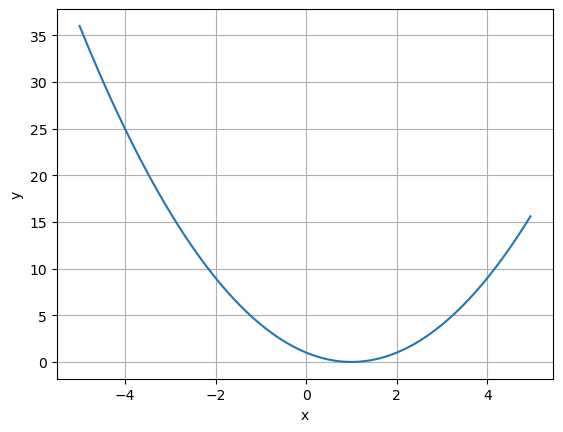

In [3]:
x=np.arange(-5,5,0.05)
plt.figure()
plt.plot(x,y(x))
plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')

## 2. Eine Iteration in Python schreiben

Für den Page-Rank-Algorithmus benötigen wir noch eine Iteration, eine Schleife, die gleiche Instruktionen mit leicht anderen Werten wiederholt.

Text(0, 0.5, 'y')

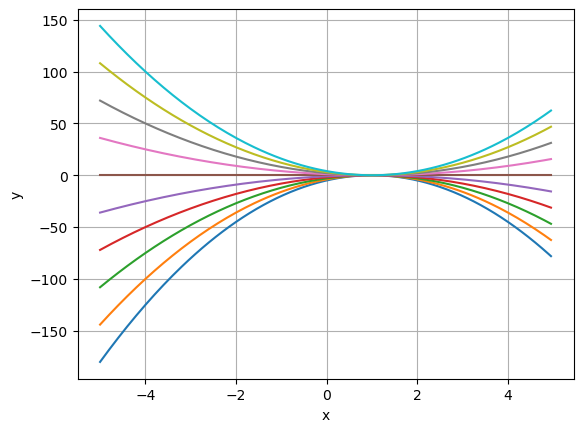

In [4]:
plt.figure()
#Iteration für den Wert a von -5 bis 4
for k in range(-5,5):
    plt.plot(x,y(x,a=k))

plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')

Wir können genauso den Parameter $b$ ändern:

Text(0, 0.5, 'y')

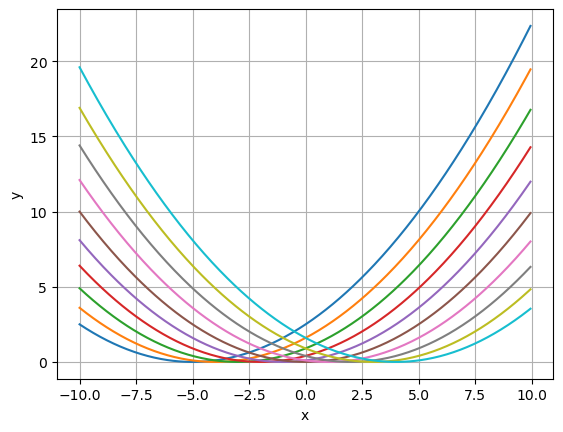

In [5]:
x=np.arange(-10,10,0.05)
plt.figure()
#Iteration für den Wert a von -5 bis 4
for k in range(-5,5):
    plt.plot(x,y(x,a=0.1,b=k))

plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')

## 3. Schreiben Sie eine `python`-Funktion für $y(x)=\sin(ax)$
- Schreiben Sie eine `python`-Funktion für $y(x)=\sin(ax)$
- Plotten Sie diese Funktion für verschieden Werte des Parameters $a$ für $x\in [-5,5]$

## 4. Nun sind wir bereit:

Nun können wir eine **Funktion `pagerank`** definieren, welche als Input-Argumente die Adjazenzmatrix `A`, die Anzahl der Iterationen und den Dämpfungsfaktor `d` entgegennimmt und den Page-Rank jedes Knotens des Graphen zurückgibt.

In [6]:
def pagerank(A, num_iterations: int = 100, d: float = 0.85):
    #PageRank: The trillion dollar algorithm.

    #Anzahl der Knoten
    N = A.shape[1]
    #Initialisierung von v mit einer gleichverteilten Übergangswahrscheinlichkeit
    v = np.ones(N) / N
    #Definition von A_hat
    A_hat = (d * A + (1 - d) / N)
    #Iteration
    for i in range(num_iterations):
        #Matrix-Vektor-Produkt
        v = A_hat @ v
    return v

- Testen wir den Algorithmus mit einer einfachen **Adjazenzmatrix**:
- Können Sie den *gerichteten, gewichteten Graphen* zeichnen, der zu dieser Adjazenzmatrix gehört,?

In [7]:
A1 = np.array([[0, 0, 0, 0, 1],
              [0.5, 0, 0, 0, 0],
              [0.5, 0, 0, 0, 0],
              [0, 1, 0.5, 0, 0],
              [0, 0, 0.5, 1, 0]])
A1

array([[0. , 0. , 0. , 0. , 1. ],
       [0.5, 0. , 0. , 0. , 0. ],
       [0.5, 0. , 0. , 0. , 0. ],
       [0. , 1. , 0.5, 0. , 0. ],
       [0. , 0. , 0.5, 1. , 0. ]])

Testen wir, ob die Summe der Einträge einer Spalte sich zu 1 addieren und somit eine Übergangswahrscheinlikeit darstellen:

In [8]:
A1.sum(axis=0)

array([1., 1., 1., 1., 1.])

In [9]:
v = pagerank(A1, 100, 0.85)
print(v)

[0.25419178 0.13803151 0.13803151 0.20599017 0.26375504]


Versuchen Sie es mit einer eigenen Adjazenzmatrix $A$, z.B. mit jener auf auf Seite 35 der Präsentation.

In [10]:
A=np.array([
    [0, 1, 1/3, 0,0 ,0,0],
    [0, 0, 1/3, 0,1/2,0,0],
    [0, 0, 0, 0,0,1/2,0],
    [0, 0, 0, 0,0,1/2,0],
    [0, 0, 1/3, 1/2,0,0,0],
    [1, 0, 0, 0,0,0,0],
    [0, 0, 0, 1/2,1/2,0,1]])

A.sum(axis=0)

array([1., 1., 1., 1., 1., 1., 1.])

In [11]:
v = pagerank(A, 100, 0.85)
print(v)

[0.09914058 0.06930914 0.06635025 0.06635025 0.06842666 0.10569806
 0.52472506]
